# [Python Data Science Toolbox](https://www.datacamp.com/completed/statement-of-accomplishment/course/564d2a345e2542d30f29eb913caae1dcc8588db9)

### Scope

Not all objects are accessible everywhere in a script. The part of a program where an object or name may be accessed is called its _scope_.

Python has four types of scope: _local_, _enclosing_, _global_, and _builtin_. This is also the order in which Python will search for a variable and is known as the _LEGB rule_.

When in the local scope of a function, you can access global variables; however, you cannot modify them. In order to modify global variables, you must first use the `global` keyword on the variable.

#### Closures

When using a _closure_, you can modify the value of a variable in the _enclosing scope_. To do this, you must use the `nonlocal` keyword.

In Python, closures have a special `__closure__` attribute that returns a tuple of cell objects. Cell objects have a `cell_contents` attribute that returns the value contained in the cell.

In [25]:
# closures are stateful functions that return functions
def makeIncrementer():
    i = 0

    def incrementer():
        # you must declare `i` as nonlocal to modify it
        nonlocal i
        i += 1
        return i

    return incrementer


incrementer = makeIncrementer()

# will be `None` if not a closure
print(incrementer.__closure__[0].cell_contents)  # 0
print(incrementer())  # 1
print(incrementer())  # 2

0
1
2


#### Decorators

The _Decorator_ design pattern allows you to modify an object without changing its source. In Python, decorators can be functions or classes that take a function as an argument and return a modified version of that function.

In [26]:
# memoize example (no args)
def memoize(fn):
    cache = {}

    def wrapper(*args):
        if args not in cache:
            print(f"{fn.__name__}({args[0]})")
            cache[args] = fn(*args)
        return cache[args]

    return wrapper


@memoize
def fib(n):
    if n <= 1:
        return n
    return fib(n - 1) + fib(n - 2)


print(fib(5))
print(fib(5))  # cached

fib(5)
fib(4)
fib(3)
fib(2)
fib(1)
fib(0)
5
5


In [27]:
# `wraps` copies metadata like the `name` and `doc` from `fn` to `wrapper`
from functools import wraps


def decorator(fn):
    @wraps(fn)
    def wrapper(*args, **kwargs):
        print("decorated")
        return fn(*args, **kwargs)

    return wrapper


# decorate existing functions by reassigning them
decorated_len = decorator(len)

length = decorated_len([1, 2, 3])  # decorated
print(decorated_len.__name__)  # len
print(decorated_len.__doc__)  # Return the number of items in a container.
print(length)  # 3

# access the original with `__wrapped__`
print(decorated_len.__wrapped__([1, 2, 3]))  # 3

decorated
len
Return the number of items in a container.
3
3


In [28]:
import signal
from functools import wraps


# timeout example with args and wraps
def timeout(n):
    def decorator(fn):
        @wraps(fn)
        def wrapper(*args, **kwargs):
            def handler(*_):
                raise TimeoutError()

            # register a signal handler for SIGALRM
            # emit SIGALRM after `n` seconds
            signal.signal(signal.SIGALRM, handler)
            signal.alarm(n)
            try:
                return fn(*args, **kwargs)
            finally:
                # cancel the alarm by setting it to 0 (if the function returned)
                signal.alarm(0)

        return wrapper

    return decorator


@timeout(2)
def timeout_example():
    while True:
        pass


try:
    timeout_example()
except TimeoutError:
    print("TimeoutError")  # TimeoutError after 2 seconds

TimeoutError


#### Namespaces

_Namespaces_ are essentially containers for mapping names to objects (like a dictionary).

In [29]:
# `globals` allows you to access global variables
# NOTE: `globals` are user-defined; `builtins` are system-defined
two = globals()["i"]  # 2

In [30]:
# `locals` allows you to access local variables and function arguments
def fn(foo):
    bar = "bar"
    return (locals()["foo"], locals()["bar"])  # `globals` would raise a KeyError


foo, bar = fn("foo")  # 'foo', 'bar'

In [31]:
# list builtins
builtins = dir(__builtins__)

### Lambda Functions

$\lambda$ functions are anonymous functions. They are useful for passing simple functions as arguments to other functions.

In [32]:
def apply(fn, x, y):
    return fn(x, y)


result = apply(lambda x, y: x + y, 1, 2)  # 3

# map/filter/reduce
nums = [1, 2, 3, 4, 5]

# map
squares = map(lambda n: n * n, nums)  # [1, 4, 9, 16, 25]

# filter
evens = filter(lambda n: n % 2 == 0, nums)  # [2, 4]

# reduce
from functools import reduce

result = reduce(lambda acc, n: acc + n, nums, 0)  # 15

### Error Handling

Python has very intuitive error handling. You can use `try` and `except` to "catch" errors, or `raise` to "throw" your own errors.

You can also catch only specific errors by type. All errors inherit from the `BaseException` class. _Programmer errors_ inherit from `Exception`.

In [33]:
try:
    print(0 / 0)
except ZeroDivisionError:
    print("cannot divide by zero")

cannot divide by zero


In [34]:
try:
    raise Exception("💥")
except Exception as e:
    print(e)

💥


### Iterables and Iterators

An _iterable_ is a special object in Python that can be iterated over. Examples of iterables include all sequence types (such as `list`, `str`, and `tuple`) and some non-sequence types like `dict` and `file`. All these objects have an `__iter__()` method which is used to get an _iterator_.

Iterators are objects with a `__next__()` method which will yield the next element of the iterable when called. If there are no more elements, it should raise a `StopIteration` exception. Iterators also have an `__iter__()` method which returns itself.

Iterating over an iterator is known as _consuming_ the iterator. When there are no elements left, the iterator is _exhausted_.

The global `iter()` and `next()` functions are used to create and iterate over an iterator, respectively.

In [35]:
r = range(1, 4)  # `r` is a range object (must be converted to an iterator)
it = iter(r)  # `it` is an iterator
i = next(it)  # 1
i = next(it)  # 2
i = next(it)  # 3

try:
    # `stop` is exclusive
    i = next(it)
    print(i)  # won't be printed
except StopIteration:
    # do nothing
    pass

There are also functions that take iterables and iterators as arguments, such as `sum()`, `list()`, and `tuple()`.

In [36]:
l = list(range(4))  # [0, 1, 2, 3]
s = sum(l)  # 6
t = tuple(l[1:3])  # (1, 2)

We can _enumerate_ an iterable and get tuples of the form `(index, value)` by using the `enumerate()` function.

In [37]:
x = ["a", "b", "c"]
e = enumerate(x)
l = list(e)  # [(0, "a"), (1, "b"), (2, "c")]

type(e)  # <class 'enumerate'>

# we exhausted `e` above
# start index at 1
for index, value in enumerate(x, start=1):
    print(f"({index}, '{value}')")

(1, 'a')
(2, 'b')
(3, 'c')


If you have two (or more) lists of the same length and want to iterate over them simultaneously, you can use the `zip()` function. This will return a list of tuples of the form `(list1[i], list2[i])`.

In [38]:
list1 = [1, 2, 3]
list2 = ["a", "b", "c"]
z = zip(list1, list2)
l = list(z)  # [(1, "a"), (2, "b"), (3, "c")]

type(z)  # <class 'zip'>

# can also use the `*` (splat) operator to unzip
z = zip(list1, list2)  # (1, 'a') (2, 'b') (3, 'c')

# can convert a zip to a dict
d = dict(z)  # {1: 'a', 2: 'b', 3: 'c'}

The `itertools` module contains many useful functions for working with iterators.

In [39]:
import itertools

# infinite counter
counter = itertools.count(start=1, step=1)
c = next(counter)  # 1
c = next(counter)  # 2
c = next(counter)  # 3

# infinite cycle
cycler = itertools.cycle([1, 2])
c = next(cycler)  # 1
c = next(cycler)  # 2
c = next(cycler)  # 1

# infinite repeater
repeater = itertools.repeat(42)
r = next(repeater)  # 42
r = next(repeater)  # 42

# Cartesian product
cart = itertools.product([1, 2], ["a", "b"])  # (1, 'a') (1, 'b') (2, 'a') (2, 'b')

# permutations of length 2 (1,2 != 2,1)
perm = itertools.permutations([1, 2, 3], 2)  # (1, 2) (1, 3) (2, 1) (2, 3) (3, 1) (3, 2)

# combinations of length 2 (1,2 == 2,1)
comb = itertools.combinations([1, 2, 3], 2)  # (1, 2) (1, 3) (2, 3)

### List Comprehension

_List comprehension_ is a powerful feature of Python that allows you to create lists in a single line of code. It is a more concise way of creating lists than using loops and list appends.

In [40]:
squares = [i**2 for i in range(10)]  # [0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

# nested list comprehension
matrix = [[col for col in range(5)] for row in range(5)]

# conditional predicate list comprehension
squares_even = [i**2 for i in range(10) if i ** 2 % 2 == 0]

# conditional output list comprehension
even_or_odd = ["even" if i % 2 == 0 else "odd" for i in range(10)]

### Dictionary Comprehensions

_Dictionary comprehension_ is similar to list comprehension, but it creates dictionaries instead of lists.

In [41]:
# dictionary comprehension
# { key_expression: value_expression for expression in iterable}
squares_dict = {i: i**2 for i in range(10)}

### Generator Expressions

_Generator expressions_ are similar to list comprehensions, except that generators _generate_ their values on-the-fly, instead of storing them all in memory like a traditional list.

The `next()` function is used to iterate over a generator.

In [42]:
squares_lazy = (i**2 for i in range(10))  # generator
square = next(squares_lazy)  # 0
square = next(squares_lazy)  # 1
square = next(squares_lazy)  # 4
rest = list(squares_lazy)  # [9, 16, 25, 36, 49, 64, 81]

### Generator Functions

_Generator functions_ are functions that don't return, but instead _yield_ a value.

In [43]:
def squares():
    i = 0
    while True:
        yield i**2
        i += 1  # you can have expressions after `yield`


# `gen` is a generator object
gen = squares()
square = next(gen)  # 0
square = next(gen)  # 1
square = next(gen)  # 4

### Context Managers

_Context managers_ are used with the `with` statement to ensure that resources are managed properly. They are most commonly used with opening files or connecting to databases. 

Under the hood, context managers use the `__enter__()` and `__exit__()` methods to allocate and release resources, respectively.

For example, you could connect to a database in your `__enter__` method and close the connection in your `__exit__` method. If you were writing a script, you could ensure that the transaction is rolled back if any exceptions are raised.

In [44]:
import csv

# example without pandas (row-by-row, not chunked dataframes)
with open("tweets.csv") as f:
    # parse the csv
    reader = csv.reader(f)
    # get the header
    header = next(reader)
    # iterate over the rows (header is already consumed)
    for row in reader:
        # only first
        if reader.line_num > 2:  # line_num starts at 1
            break
        # each `row` is a list of strings representing the columns
        # we can convert the string to a dict using the header row as keys
        tweet = dict(zip(header, row))
        print(tweet["text"])

RT @bpolitics: .@krollbondrating's Christopher Whalen says Clinton is the weakest Dem candidate in 50 years https://t.co/pLk7rvoRSn https:/…


In [45]:
import csv


# create a context manager class
class OpenCSV:
    def __init__(self, filename):
        self.filename = filename

    def __enter__(self):
        # `open` can be called outside `with`
        self.f = open(self.filename, "r")
        self.reader = csv.reader(self.f)
        return self.reader

    # to implement `__exit__` you must pass all 4 arguments even if you don't use them
    def __exit__(
        self,
        exception_type,
        exception_value,
        exception_traceback,
    ):
        self.f.close()


with OpenCSV("tweets.csv") as reader:
    header = next(reader)
    for row in reader:
        if reader.line_num > 2:  # line_num starts at 1
            break
        tweet = dict(zip(header, row))
        print(tweet["text"])

RT @bpolitics: .@krollbondrating's Christopher Whalen says Clinton is the weakest Dem candidate in 50 years https://t.co/pLk7rvoRSn https:/…


In [46]:
import csv
from contextlib import contextmanager


# create a context manager generator function using a decorator (preferred)
@contextmanager
def open_csv(filename):
    f = open(filename, "r")
    reader = csv.reader(f)
    try:
        # yield because this is a generator
        yield reader
    finally:
        f.close()


with open_csv("tweets.csv") as reader:
    header = next(reader)
    for row in reader:
        if reader.line_num > 2:  # line_num starts at 1
            break
        tweet = dict(zip(header, row))
        print(tweet["text"])

RT @bpolitics: .@krollbondrating's Christopher Whalen says Clinton is the weakest Dem candidate in 50 years https://t.co/pLk7rvoRSn https:/…


### Chunking DataFrames

When working with large datasets, you'll need to _chunk_ the data into smaller pieces to process it due to memory constraints.

The `chunksize` kwarg is used to specify the number of rows to read into memory at a time. This returns a `TextFileReader` object which can be iterated over to get the chunks. Each chunk is actually a `DataFrame` object, so you can perform any Pandas operations on it, store the results, and then discard the chunk.

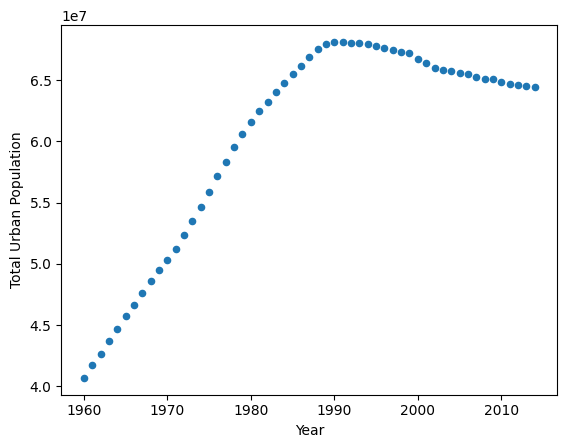

In [47]:
import matplotlib.pyplot as plt
import pandas as pd


def plot_pop(filename, country_code):
    """Plot urban population data for a given country."""

    # Initialize reader object
    # NOTE: `urb_pop_reader` is a TextFileReader NOT a DataFrame because we specified `chunksize`
    urb_pop_reader = pd.read_csv(filename, chunksize=1000)

    # Initialize empty DataFrame
    data = pd.DataFrame()

    # Iterate over each DataFrame chunk
    for df_urb_pop in urb_pop_reader:
        # NOTE: `df_pop_ceb` is a slice of a chunked dataframe; when mutating, you must make a copy first
        df_pop_ceb = df_urb_pop[df_urb_pop["CountryCode"] == country_code].copy()  # 👈

        # Zip DataFrame columns of interest
        pops = zip(df_pop_ceb["Total Population"], df_pop_ceb["Urban population (% of total)"])

        # Turn zip object into list
        pops_list = list(pops)

        # Use list comprehension to create new DataFrame column 'Total Urban Population' (mutates `df_pop_ceb`)
        df_pop_ceb["Total Urban Population"] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]

        # Concatenate DataFrame chunk to the end of data
        data = pd.concat([data, df_pop_ceb])

    # Plot urban population data
    data.plot(kind="scatter", x="Year", y="Total Urban Population")
    plt.show()


# Call plot_pop
plot_pop("ind_pop_data.csv", "CEB")